# Project: K-Nearest Neighbors - Train/Test Split

---

In [1]:
import matplotlib.pyplot as plt

% matplotlib inline

In [2]:
import pandas as pd
import numpy as np

In [3]:
# Read the iris data into a DataFrame
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv(url, header=None, names=col_names)

In [4]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [6]:
# Increase the default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14

In [7]:
# Create a custom colormap
from matplotlib.colors import ListedColormap

cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

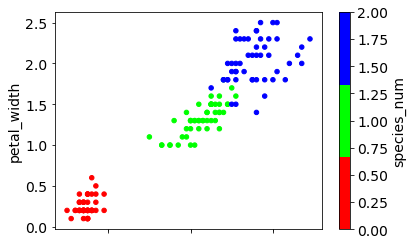

In [8]:
# Map each iris species to a number
# Let's use Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2 and create a column called 'species_num'
iris['species_num'] = iris.species.map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

# Create a scatterplot of PETAL LENGTH versus PETAL WIDTH and color by SPECIES
iris.plot(kind='scatter', x='petal_length', y='petal_width', c='species_num', colormap=cmap_bold);

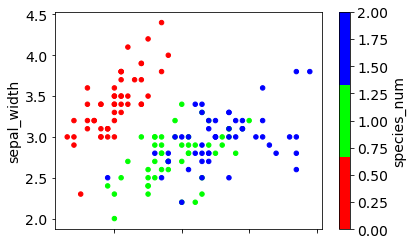

In [9]:
# Create a scatterplot of SEPAL LENGTH versus SEPAL WIDTH and color by SPECIES
iris.plot(kind='scatter', x='sepal_length', y='sepal_width', c='species_num', colormap=cmap_bold)

## KNN Classification of the Iris Dataset

### Create your feature matrix "X"
This will be all species measurements (sepal length, petal width, etc...)

In [10]:
feature_matrix = ['sepal_length', 'petal_width']
X = iris[feature_matrix]

### Create your target vector "y"
This will be the species type.

In [11]:
y = iris['species_num']

### Make Use of Train-Test-Split
Split your data in to train and test sets.

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

### Import KNN From `scikit-learn` and Instatiate a Model With One Neighbor

In [13]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

### Check the Accuracy
Train your model using the training set then use the test set to determine the accuracy

In [14]:
from sklearn import metrics

y_pred_class = knn.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred_class)))

0.9473684210526315


### Create a Model With Five Neighbors. Did it Improve?

In [15]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [16]:
y_pred_class = knn.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred_class)))

0.9473684210526315


### Create a Looped Function That Will Check All Levels of Various Neighbors and Calculate the Accuracy

In [17]:
scores = []
for k in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred_class = knn.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred_class)
    scores.append([k, score])

In [18]:
scores

[[1, 0.9473684210526315],
 [2, 0.9473684210526315],
 [3, 0.9473684210526315],
 [4, 0.9473684210526315],
 [5, 0.9473684210526315],
 [6, 0.9473684210526315],
 [7, 0.9473684210526315],
 [8, 0.9473684210526315],
 [9, 0.9473684210526315],
 [10, 0.9473684210526315],
 [11, 0.9473684210526315],
 [12, 0.9473684210526315],
 [13, 0.9473684210526315],
 [14, 0.9473684210526315],
 [15, 0.9736842105263158],
 [16, 0.9736842105263158],
 [17, 0.9736842105263158],
 [18, 0.9736842105263158],
 [19, 0.9736842105263158],
 [20, 0.9736842105263158],
 [21, 0.9736842105263158],
 [22, 0.9736842105263158],
 [23, 0.9736842105263158],
 [24, 0.9736842105263158],
 [25, 0.9736842105263158],
 [26, 0.9736842105263158],
 [27, 0.9473684210526315],
 [28, 0.9736842105263158],
 [29, 0.9473684210526315],
 [30, 0.9473684210526315],
 [31, 0.9473684210526315],
 [32, 0.9473684210526315],
 [33, 0.9473684210526315],
 [34, 0.9473684210526315],
 [35, 0.9473684210526315],
 [36, 0.9473684210526315],
 [37, 0.9473684210526315],
 [38, 0.94

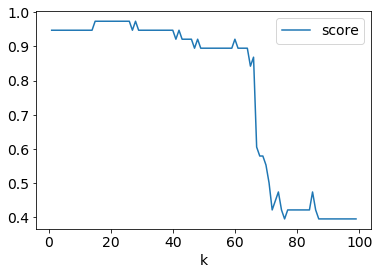

In [19]:
data = pd.DataFrame(scores,columns=['k','score'])
data.plot.line(x='k',y='score');

In [23]:
data.sort_values('score', ascending=False).head(15)

,k,score
27,28,0.973684
14,15,0.973684
25,26,0.973684
24,25,0.973684
23,24,0.973684
22,23,0.973684
21,22,0.973684
20,21,0.973684
19,20,0.973684
18,19,0.973684


## Conclusion

- When using KNN on this data set with these features, the best value for K is likely to be around 15 to 26.
- Given the information of an unknown flower, we estimate that we would be able to correctly predict its species 97% of the time.